<a href="https://colab.research.google.com/github/stefymojica/analisis_marketing_digital/blob/master/markeing_digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MARKETING DIGITAL**


---











Objetivo: Crear un modelo predictivo que permita predecir el CTR(click throught rate)

In [987]:
#Cargando librerias

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

## Lectura de datos

In [988]:
XY = pd.read_csv("https://proyectosmachinelearning.s3.us-east-2.amazonaws.com/Base_proyecto.csv")


In [989]:
XY.head()

,id,ad_position,ad_size,hour_of_day_utc,inventory_source,platform_bandwidth,environment_type,platform_carrier,app_bundle,domain,clicks,impressions,ctr
0,1,FULLSCREEN,320x480,21,UNITY,WIFI,APP,-1,Other,UNKNOWN,6,29,0.206897
1,2,FULLSCREEN,320x480,23,UNITY,WIFI,APP,-1,com.wordgame.puzzle.board.es,UNKNOWN,13,86,0.151163
2,3,0,320x480,23,OPERA_MEDIA,CELL_3G,APP,Claro,com.jamendoandoutly.mainpakkage,UNKNOWN,0,11,0.000000
3,4,FULLSCREEN,320x480,23,MOPUB,CELL_4G,APP,Movistar,com.drilens.wamr,UNKNOWN,0,38,0.000000
4,5,0,320x480,5,OPERA_MEDIA,WIFI,APP,Movistar,com.jam.endo,UNKNOWN,0,19,0.000000


In [990]:
print(u'- El numero de filas en el dataset es: {}'.format(XY.shape[0]))
print(u'- El numero de columnas en el dataset es: {}'.format(XY.shape[1]))
print(u'- Los nombres de las variables son: {}'.format(list(XY.columns)))

- El numero de filas en el dataset es: 41352
- El numero de columnas en el dataset es: 13
- Los nombres de las variables son: ['id', 'ad_position', 'ad_size', 'hour_of_day_utc', 'inventory_source', 'platform_bandwidth', 'environment_type', 'platform_carrier', 'app_bundle', 'domain', 'clicks', 'impressions', 'ctr']


In [991]:
XY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41352 entries, 0 to 41351
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  41352 non-null  int64  
 1   ad_position         41352 non-null  object 
 2   ad_size             41352 non-null  object 
 3   hour_of_day_utc     41352 non-null  int64  
 4   inventory_source    41352 non-null  object 
 5   platform_bandwidth  41352 non-null  object 
 6   environment_type    41352 non-null  object 
 7   platform_carrier    41352 non-null  object 
 8   app_bundle          41352 non-null  object 
 9   domain              41352 non-null  object 
 10  clicks              41352 non-null  int64  
 11  impressions         41352 non-null  int64  
 12  ctr                 41352 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 4.1+ MB


# Preprocesamiento de datos

In [992]:
XY.isnull().sum()

id                    0
ad_position           0
ad_size               0
hour_of_day_utc       0
inventory_source      0
platform_bandwidth    0
environment_type      0
platform_carrier      0
app_bundle            0
domain                0
clicks                0
impressions           0
ctr                   0
dtype: int64

In [993]:
XY.isnull().any()

id                    False
ad_position           False
ad_size               False
hour_of_day_utc       False
inventory_source      False
platform_bandwidth    False
environment_type      False
platform_carrier      False
app_bundle            False
domain                False
clicks                False
impressions           False
ctr                   False
dtype: bool

Como se puede evidenciar no existen valores nulos en ninguna de las variables de el DataFrame

## Grafico de barras de Frecuencias relativas

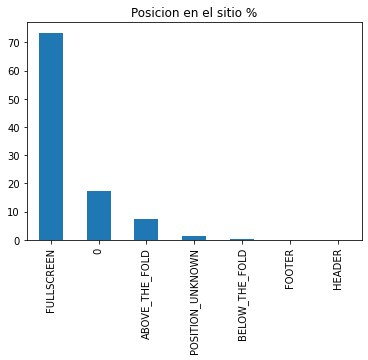

In [994]:
plot = (100 * XY['ad_position'].value_counts()/ len(XY['ad_position'])).plot(kind='bar', title='Posicion en el sitio %')

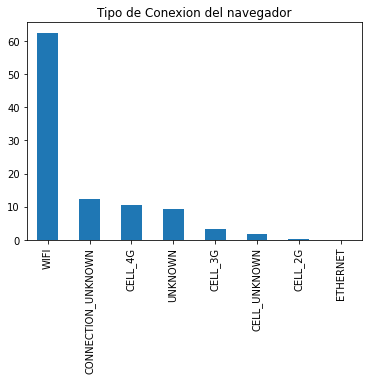

In [995]:
plot = (100 * XY['platform_bandwidth'].value_counts()/ len(XY['platform_bandwidth'])).plot(kind='bar', title='Tipo de Conexion del navegador')

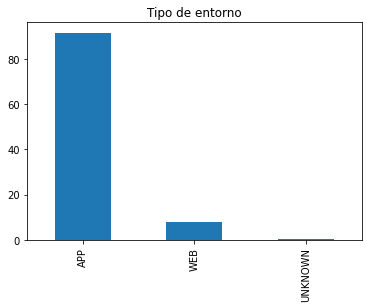

In [996]:
plot = (100 * XY['environment_type'].value_counts()/ len(XY['environment_type'])).plot(kind='bar', title='Tipo de entorno')


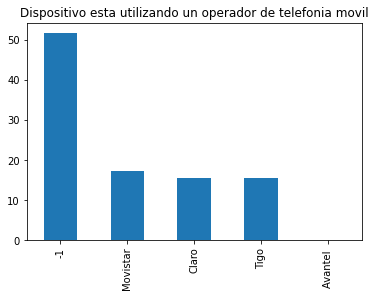

In [997]:
plot = (100 * XY['platform_carrier'].value_counts()/ len(XY['platform_carrier'])).plot(kind='bar', title='Dispositivo esta utilizando un operador de telefonia movil')

## Categoricas a numericas

1. A continuacion se convertiran las categoricas a numericas, esto con el fin de introducirlas en los modelos

In [998]:
XY.select_dtypes(exclude=['number']).columns

Index(['ad_position', 'ad_size', 'inventory_source', 'platform_bandwidth',
       'environment_type', 'platform_carrier', 'app_bundle', 'domain'],
      dtype='object')

In [999]:
ohe = OneHotEncoder(categories="auto", drop=None,dtype=np.float64,handle_unknown="ignore",sparse=False)

In [1000]:
# ad_position
XY['ad_position'].value_counts()

FULLSCREEN          30357
0                    7132
ABOVE_THE_FOLD       3063
POSITION_UNKNOWN      605
BELOW_THE_FOLD        171
FOOTER                 23
HEADER                  1
Name: ad_position, dtype: int64

In [1001]:
XY.ad_position = ohe.fit_transform(XY[['ad_position']])

In [1002]:
ohe.categories_

[array(['0', 'ABOVE_THE_FOLD', 'BELOW_THE_FOLD', 'FOOTER', 'FULLSCREEN',
        'HEADER', 'POSITION_UNKNOWN'], dtype=object)]

In [1003]:
# ad_size

XY['ad_size'].value_counts()

320x480     28294
320x50       4656
480x320      3940
300x250      2729
300x50        626
728x90        380
300x600       295
-1x-1         102
320x100       102
300x480        52
336x280        38
411x64         34
360x56         25
160x600        21
250x250        19
300x100        13
768x1024        4
320x568         4
414x736         3
412x814         2
375x667         2
360x592         1
424x808         1
360x640         1
256x192         1
412x790         1
400x824         1
320x570         1
370x58          1
1x1             1
360x598         1
360x703         1
Name: ad_size, dtype: int64

In [1004]:
XY.ad_size = ohe.fit_transform(XY[['ad_size']])

In [1005]:
ohe.categories_

[array(['-1x-1', '160x600', '1x1', '250x250', '256x192', '300x100',
        '300x250', '300x480', '300x50', '300x600', '320x100', '320x480',
        '320x50', '320x568', '320x570', '336x280', '360x56', '360x592',
        '360x598', '360x640', '360x703', '370x58', '375x667', '400x824',
        '411x64', '412x790', '412x814', '414x736', '424x808', '480x320',
        '728x90', '768x1024'], dtype=object)]

In [1006]:
# inventory_source

XY['inventory_source'].value_counts()

UNITY            25201
MOPUB             6282
OPERA_MEDIA       3267
TRIPLELIFT        2948
SMARTADSERVER     1247
RUBICON            996
VERVE              583
GOOGLE_ADX         361
CRITEO             324
INMOBI              54
APPNEXUS            48
OPENX               15
RICHAUDIENCE        14
UNRULYX             10
INNERACTIVE          1
MILLENNIAL           1
Name: inventory_source, dtype: int64

In [1007]:
XY.inventory_source = ohe.fit_transform(XY[['inventory_source']])

In [1008]:
ohe.categories_

[array(['APPNEXUS', 'CRITEO', 'GOOGLE_ADX', 'INMOBI', 'INNERACTIVE',
        'MILLENNIAL', 'MOPUB', 'OPENX', 'OPERA_MEDIA', 'RICHAUDIENCE',
        'RUBICON', 'SMARTADSERVER', 'TRIPLELIFT', 'UNITY', 'UNRULYX',
        'VERVE'], dtype=object)]

In [1009]:
# platform_bandwidth

XY['platform_bandwidth'].value_counts()

WIFI                  25812
CONNECTION_UNKNOWN     5107
CELL_4G                4377
UNKNOWN                3871
CELL_3G                1322
CELL_UNKNOWN            781
CELL_2G                  65
ETHERNET                 17
Name: platform_bandwidth, dtype: int64

In [1010]:
# Esta variable se dividio en las que son plataformas con WIFI  y las que estan utilizando plataformas distintas a WIFI

XY.loc[XY['platform_bandwidth'] != 'WIFI', 'platform_bandwidth'] = 0
XY.loc[XY['platform_bandwidth'] == 'WIFI', 'platform_bandwidth'] = 1
XY['platform_bandwidth'] = XY['platform_bandwidth'].astype(int)

In [1011]:
# environment_type

XY['environment_type'].value_counts()

APP        37923
WEB         3329
UNKNOWN      100
Name: environment_type, dtype: int64

In [1012]:
XY.environment_type = ohe.fit_transform(XY[['environment_type']])

In [1013]:
ohe.categories_

[array(['APP', 'UNKNOWN', 'WEB'], dtype=object)]

In [1014]:
# platform_carrier

XY['platform_carrier'].value_counts()

-1          21382
Movistar     7170
Claro        6406
Tigo         6379
Avantel        15
Name: platform_carrier, dtype: int64

In [1015]:
XY.platform_carrier = ohe.fit_transform(XY[['platform_carrier']])

In [1016]:
ohe.categories_

[array(['-1', 'Avantel ', 'Claro', 'Movistar', 'Tigo'], dtype=object)]

In [1017]:
# app_bundle

XY['app_bundle'].value_counts()

Other                              25857
UNKNOWN                             3435
com.jamendoandoutly.mainpakkage      424
com.merge.cube.winner                411
com.callapp.contacts                 342
                                   ...  
com.superbox.aos.fire2048             85
com.zareklamy                         85
com.movinapp.dict.french.free         84
com.firsttouchgames.hero2             83
com.mobz.vd.in                        83
Name: app_bundle, Length: 86, dtype: int64

In [1018]:
XY.app_bundle = ohe.fit_transform(XY[['app_bundle']])

In [1019]:
ohe.categories_

[array(['1524620009', '1533452966', 'Other', 'UNKNOWN',
        'air.com.aceviral.motox3m', 'air.com.jogatina.domino.android',
        'aplicaciones.paleta.alterlegionanime',
        'aplicaciones.paleta.legionanimeday',
        'aplicaciones.paleta.legionanimefull',
        'aplicaciones.paleta.legionanimexs',
        'bubble.shooter.shooting.shoot.game', 'cjvg.santabiblia',
        'cn.wps.moffice_eng',
        'coloring.color.number.happy.paint.art.drawing.puzzle',
        'com.LoopGames.Domino', 'com.TeryBit.TeryBit',
        'com.app.romansl.skvishy', 'com.bigcool.puzzle.fruitgenies',
        'com.callapp.contacts', 'com.cyberlink.youcammakeup',
        'com.cyberlink.youperfect', 'com.digitalproshare.filmapp',
        'com.dogs.nine', 'com.drilens.wamr',
        'com.dropdom.blockpuzzle.hwwgame',
        'com.dualspace.multispace.android', 'com.dvex.movp',
        'com.filmlegacy.slupaf', 'com.finecameffect.fortyfunseven',
        'com.firsttouchgames.dls7', 'com.firsttouchgames.

In [1020]:
# domain

XY['domain'].value_counts()

UNKNOWN                      36239
Other                          611
rtbplus.smartadserver.com      544
callapp.com                    342
itunes.apple.com               195
                             ...  
lavidalucida.com                10
absolutelyconnected.com         10
b612.snow.me                    10
wikihow.com                     10
ahoramismo.com                  10
Name: domain, Length: 94, dtype: int64

In [1021]:
XY.domain = ohe.fit_transform(XY[['domain']])

In [1022]:
ohe.categories_

[array(['Other', 'UNKNOWN', 'absolutelyconnected.com', 'ahoramismo.com',
        'aminoapps.com', 'ask.fm', 'autogestionatusalud.com',
        'b612.snow.me', 'bbc.com', 'bebesymas.com',
        'bible.knowing-jesus.com', 'biggestchef.com',
        'bigglobaltravel.com', 'callapp.com', 'cleverclassic.com',
        'comedy.com', 'consejosytrucos.co', 'daquan.tv',
        'dff3a14dc.app-ads-txt.com', 'docjournals.com', 'doctoreport.com',
        'drama.fandom.com', 'drivepedia.com', 'easybrain.com',
        'economipedia.com', 'elmundo.es', 'fandom.com', 'fifaindex.com',
        'fortnitetracker.com', 'gameofglam.com', 'gardenmanage.com',
        'gingerize.com', 'greetingsisland.com', 'healthline.com',
        'heraldweekly.com', 'hi5.com', 'horoscoponegro.com',
        'illumeably.com', 'infotechnology.com', 'ingles.com',
        'instantlymodern.com', 'investing.com', 'investmentguru.com',
        'itunes.apple.com', 'knowing-jesus.com', 'lanacion.com.ar',
        'laopinion.com', 'la

## Comprobacion de datos numericos

Se comprueba que no existan variables categoricas dentro de los datos

In [1023]:
XY.select_dtypes(exclude=['number']).columns

Index([], dtype='object')

# Division en features X y target Y

In [1068]:
# Para X se tomaron todas las variables menos "ctr, clicks, impressions" ya que son la variable objetivo
X = XY.drop(['ctr', 'clicks', 'impressions'], axis=1)

# Para la variable Target solo se tomaron las variable "ctr"
Y = XY['ctr']

# Visualizaciones y correlaciones

In [1025]:
XY.describe()

,id,ad_position,ad_size,hour_of_day_utc,inventory_source,platform_bandwidth,environment_type,platform_carrier,app_bundle,domain,clicks,impressions,ctr
count,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000,41352.000000
mean,61397.057724,0.172470,0.002467,9.012309,0.001161,0.624202,0.917078,0.517073,0.002152,0.014776,0.776601,28.913426,0.123057
std,69941.193238,0.377793,0.049604,6.577073,0.034051,0.484334,0.275768,0.499714,0.046343,0.120655,2.196003,99.382481,0.292073
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,11498.750000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000
50%,22938.500000,0.000000,0.000000,8.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,11.000000,0.000000
75%,135533.250000,0.000000,0.000000,14.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,22.000000,0.062500
max,209561.000000,1.000000,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,3745.000000,1.000000


1. Se puede observar que el porcentaje promedio de la variable target es de 12%, lo cual demuestra que en general las publicidades en linea tienen buen exito.

## Boxplot

In [1026]:
# Se normaliza la variable X para representar los Boxplot en una misma escala
X_normalizado = (X-X.mean())/X.std()

In [1027]:
X_normalizado[:2]

,id,ad_position,ad_size,hour_of_day_utc,inventory_source,platform_bandwidth,environment_type,platform_carrier,app_bundle,domain
0,-0.877824,-0.456521,-0.049726,1.822648,-0.034089,0.775907,0.300696,0.966406,-0.046442,-0.122461
1,-0.877810,-0.456521,-0.049726,2.126735,-0.034089,0.775907,0.300696,0.966406,-0.046442,-0.122461


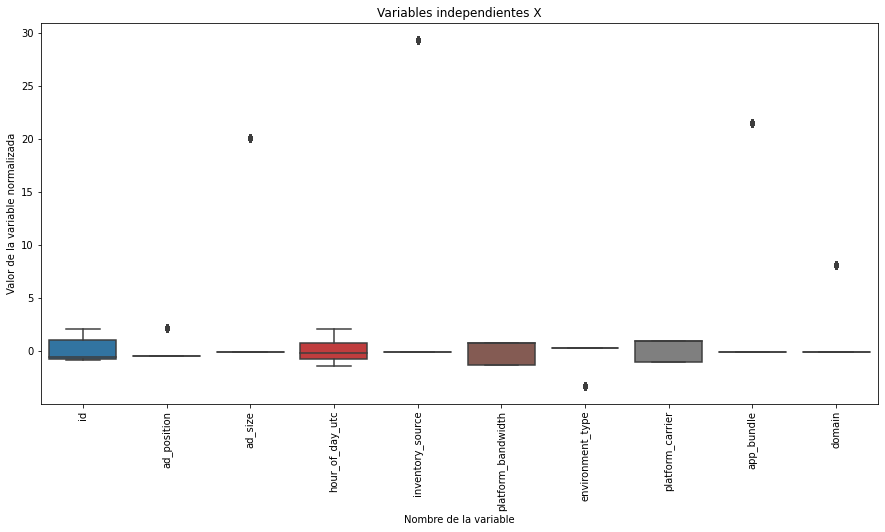

In [1028]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=X_normalizado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Variables independientes X')
plt.ylabel('Valor de la variable normalizada')
_=plt.xlabel('Nombre de la variable')

1. Se puede ver que en el Boxplot no hay muchos outliers

## Histogramas

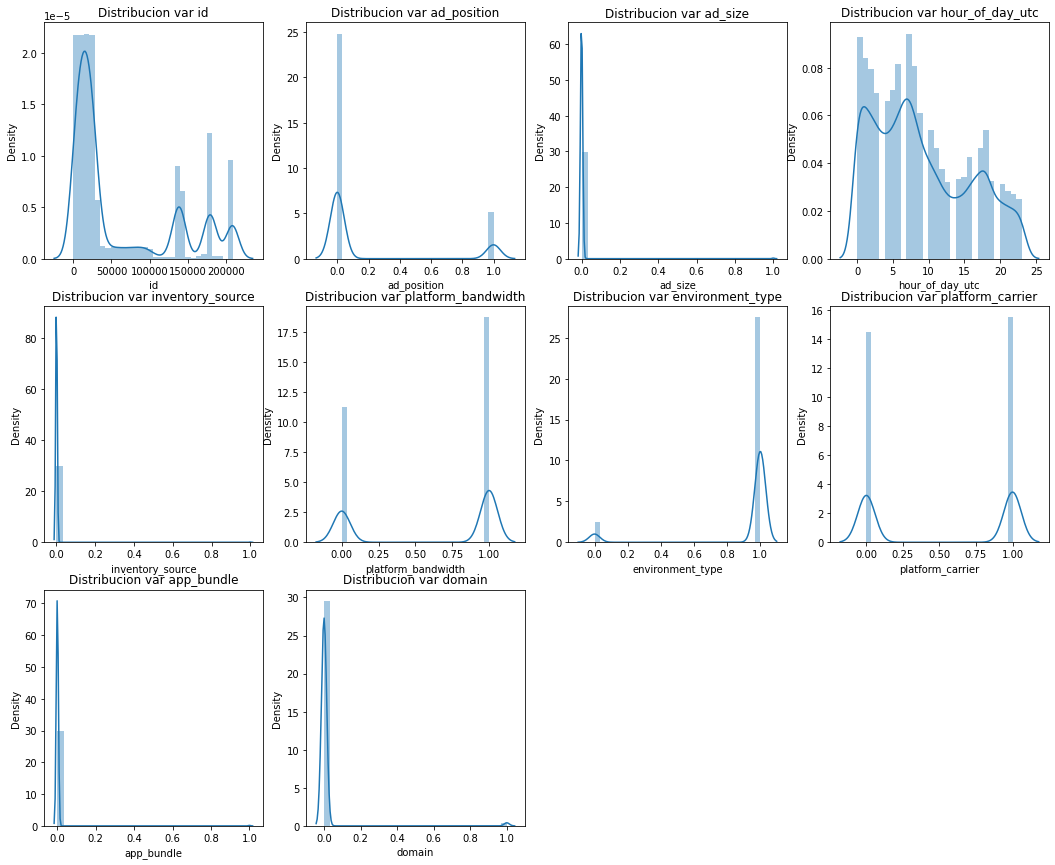

In [1029]:
plt.figure(figsize=(18,20))
n = 0
for i, columns in enumerate(X.columns):
  n+=1
  plt.subplot(4, 4, n)
  sns.distplot(X[columns], bins=30)
  plt.title('Distribucion var {}'.format(columns))
plt.show()

# Relacion variable vs Target

In [1030]:
def relaciones_vs_target(X, Y, return_type='axes'):
    '''
    Función que representa gráficos de dispersión de las variables
    en X en función a la variable Y
    '''
    fig_tot = (len(X.columns))
    fig_por_fila = 4.
    tamanio_fig = 4.
    num_filas = int( np.ceil(fig_tot/fig_por_fila) )    
    plt.figure( figsize=( fig_por_fila*tamanio_fig+5, num_filas*tamanio_fig+5 ) )
    c = 0 
    for i, col in enumerate(X.columns):
        plt.subplot(num_filas, fig_por_fila, i+1)
        sns.scatterplot(x=X[col], y=Y)
        plt.title( '%s vs %s' % (col, 'target') )
        plt.ylabel('Target')
        plt.xlabel(col)
    plt.show()


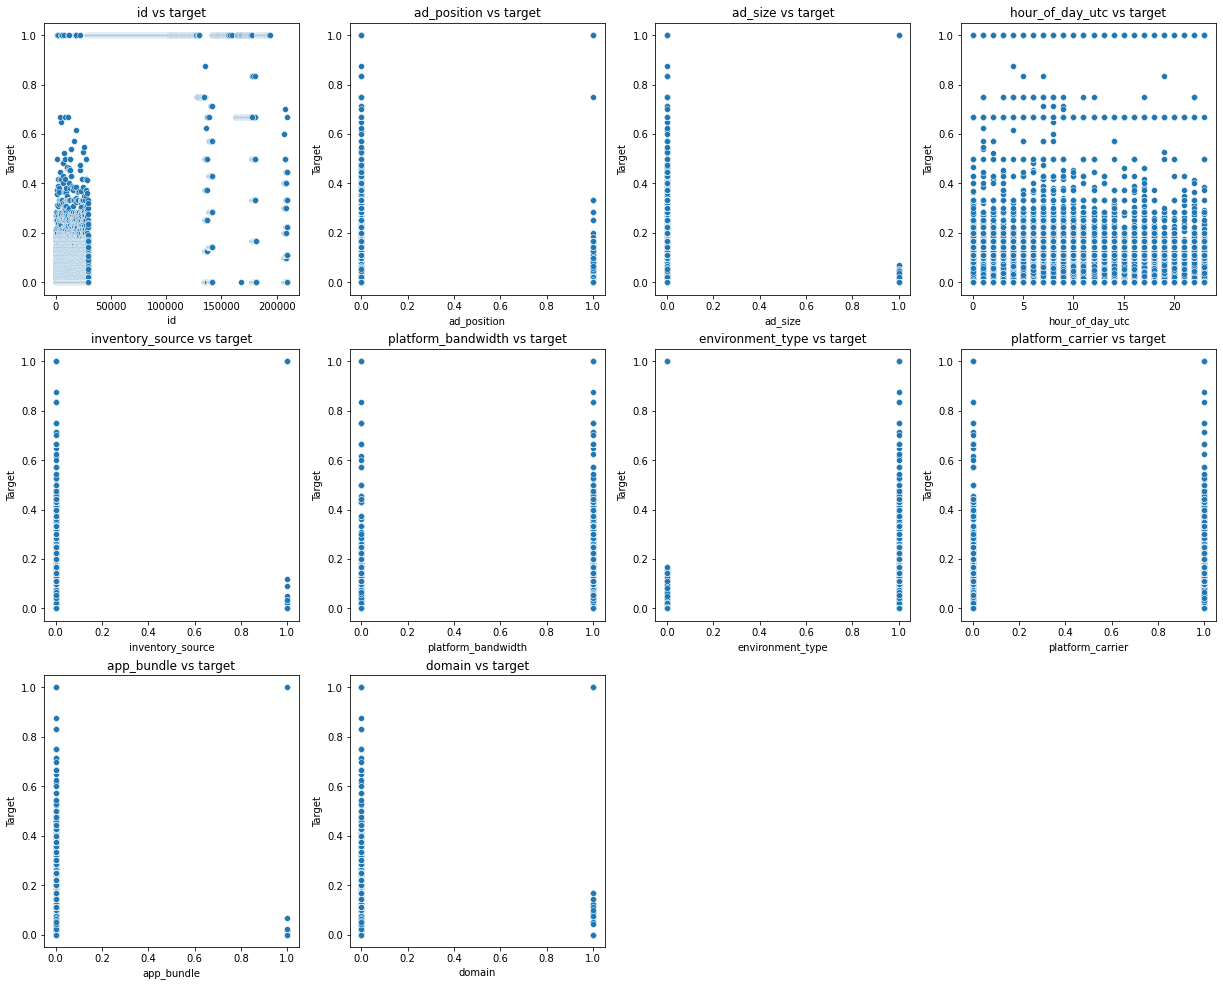

In [1031]:
relaciones_vs_target(X,Y)

In [1032]:
def represento_doble_hist(x_1, x_0, n_bins=11, title='', label_1='Clase 1', 
                          label_0='Clase 0', density=0):
    '''
    Función que recibe dos distribuciones de probabilidad y las representa
    en el mismo gráfico
    '''
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha=0.5, label=label_1, color='red')    
    plt.hist(x_0, bins, density = density, alpha=0.5, label=label_0, color='green')
    plt.title(title)
    plt.legend(loc='best') 


def hist_pos_neg_feat(x, y, density=0, nbins=11, targets=(0,1)):
    '''
    Representa las variables en x divididas en dos distribuciones
    según su valor sea 1 o 0
    '''
    fig_tot = len(x.columns)
    fig_tot_fila = 4.; fig_tamanio = 4.
    num_filas = float( np.ceil(fig_tot/fig_tot_fila) )
    plt.figure( figsize=( fig_tot_fila*fig_tamanio+2, num_filas*fig_tamanio+2 ) )
    target_neg, target_pos = targets
    for i, feat in enumerate(x.columns):
        plt.subplot(num_filas, fig_tot_fila, i+1);
        plt.title('%s' % feat)
        idx_pos = y == target_pos
        idx_neg= y == target_neg
        represento_doble_hist(x[feat][idx_pos].values, x[feat][idx_neg].values, nbins, 
                   density = density, title=('%s' % feat))

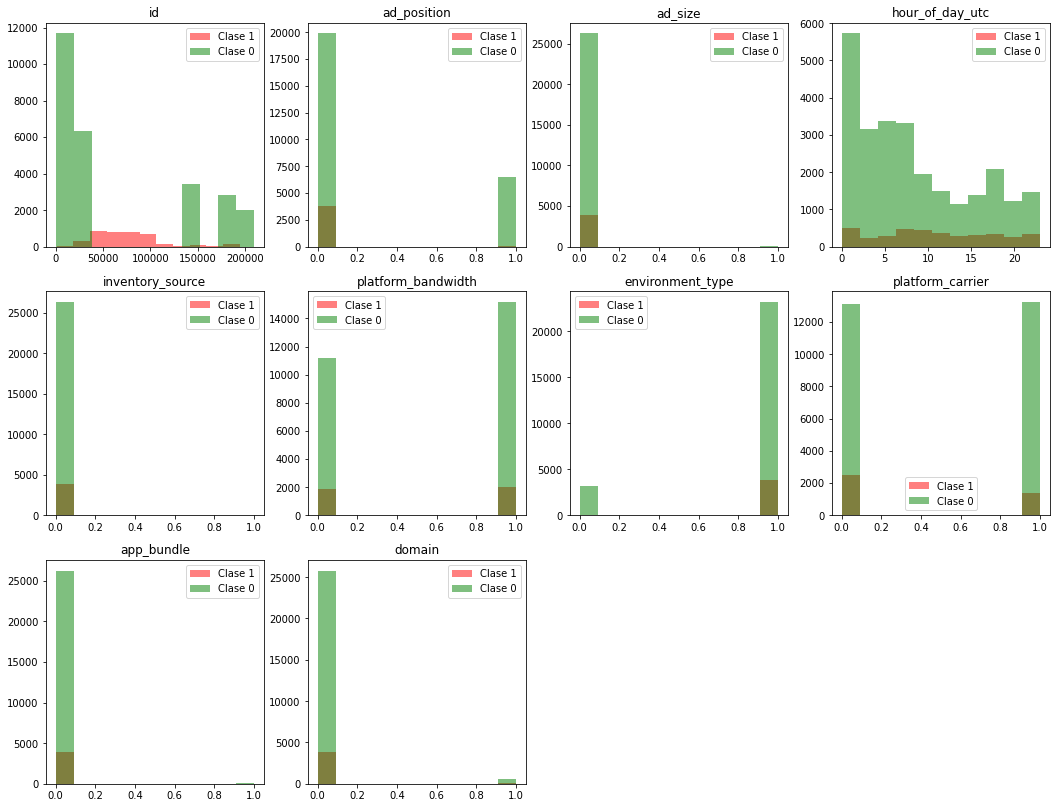

In [1033]:
hist_pos_neg_feat(X,Y)

## Matriz de correlaciones


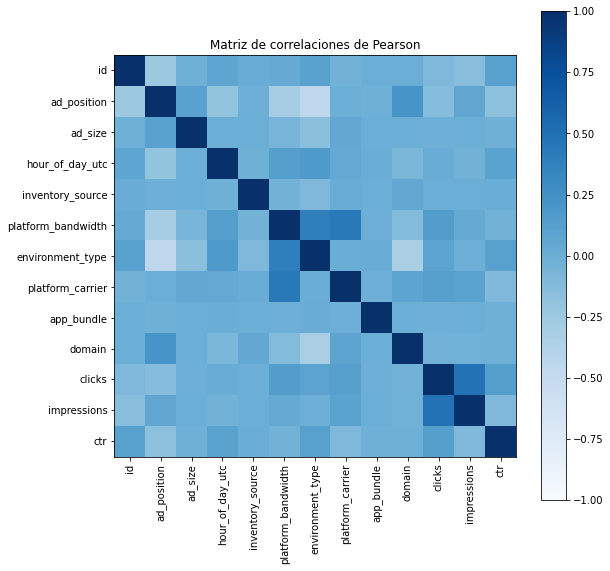

In [1034]:
matriz_correlaciones = XY.corr(method='pearson')
n_ticks = len(XY.columns)
plt.figure(figsize=(9, 9))
plt.xticks(range(n_ticks), XY.columns, rotation='vertical')
plt.yticks(range(n_ticks), XY.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')

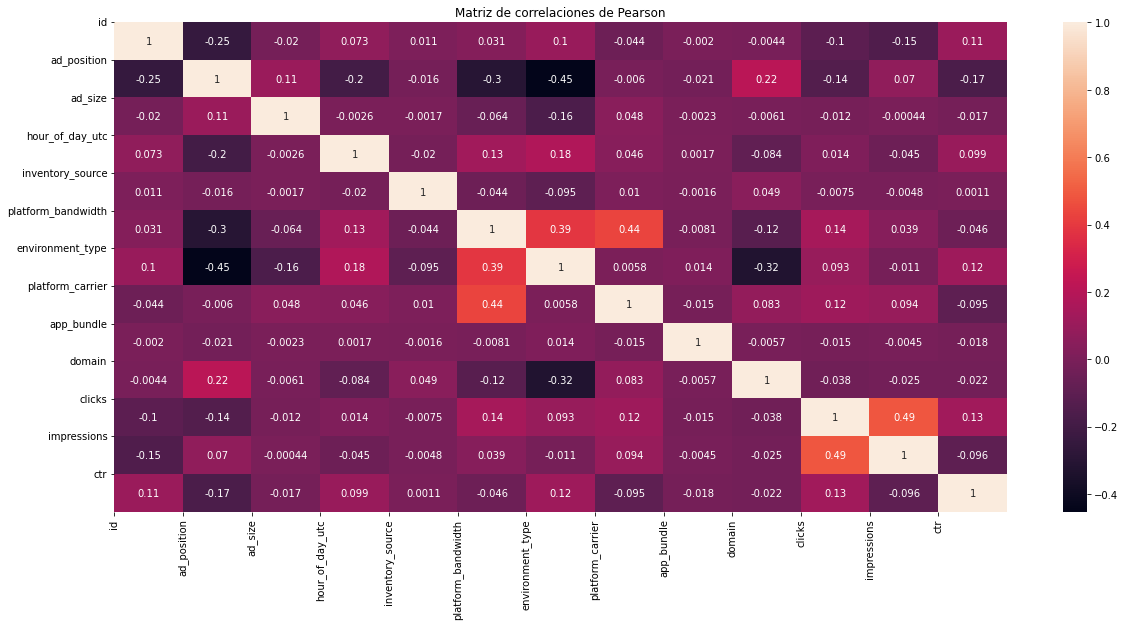

In [1035]:
correlation_map = XY.corr(method='pearson')
n_ticks = len(XY.columns)
plt.figure(figsize=(20, 9))
sns.heatmap(correlation_map, annot=True)
plt.xticks(range(n_ticks), XY.columns, rotation='vertical')
plt.yticks(range(n_ticks), XY.columns)
_ = plt.title('Matriz de correlaciones de Pearson')
plt.show()

# Estandarizacion de los datos

In [1038]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

# Division en train y test


In [1039]:
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)

# Modelo de regresion lineal

In [1040]:
# Se crea un modelo de regresion lineal
modelo1 = linear_model.LinearRegression()


In [1041]:
# Se entrena el modelo
modelo1.fit(X_train, Y_train)

LinearRegression()

In [1042]:
# Se puede predecir usando el modelo
Y_pred = modelo1.predict(X_test)

In [1043]:
print(modelo1.intercept_)


0.12344152490275415


In [1044]:
print(modelo1.coef_)

[ 0.0177935  -0.04027013  0.00253861  0.02069045  0.00091523 -0.0309184
  0.02607685 -0.01651156 -0.00721689  0.0098577 ]


In [1045]:
# predicciones
y_test = np.array(list(Y_test))
y_pred = np.array(Y_pred)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


,Actual,Predicted
0,0.000000,0.189721
1,0.000000,0.232605
2,0.071429,0.075549
3,0.000000,0.015122
4,0.000000,0.048815
...,...,...
8266,0.000000,0.068049
8267,0.100000,0.180542
8268,1.000000,0.180924
8269,0.090909,0.125623


In [1046]:
print('Error Absoluto Medio:',metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Error cuadratico medio en test: %.2f' %mean_squared_error(Y_test, Y_pred))
print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('Estadistico R_2: %.2f' % r2_score(Y_test, Y_pred))


Error Absoluto Medio: 0.17735411647921612
Error cuadratico medio en test: 0.08
Raíz del error cuadrático medio: 0.28343971151421227
Estadistico R_2: 0.05


# Modelo de Arboles de decision

In [1047]:
# Division del dataset
X_train, X_test, Y_train, Y_test =  train_test_split(X_estandarizado, Y, random_state=5)

In [1048]:
modelo2 = DecisionTreeRegressor()

In [1049]:
# Entrenando el modelo
modelo2.fit(X_train, Y_train)

DecisionTreeRegressor()

In [1050]:
# Estructura del arbol creado
print(f"Profundidad del árbol: {modelo2.get_depth()}")
print(f"Número de nodos terminales: {modelo2.get_n_leaves()}")

Profundidad del árbol: 53
Número de nodos terminales: 12877


In [1051]:
# Predictores

importancia_predictores = pd.DataFrame(
    {'predictor':X.columns,
     'importancia': modelo2.feature_importances_}
)

print("Importancia de los predictores del modelo")
print("-----------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores del modelo
-----------------------------------------


,predictor,importancia
0,id,9.897348e-01
3,hour_of_day_utc,6.226634e-03
7,platform_carrier,1.538860e-03
1,ad_position,1.193206e-03
5,platform_bandwidth,1.007567e-03
6,environment_type,2.701279e-04
9,domain,1.585839e-05
8,app_bundle,1.157575e-05
4,inventory_source,7.503768e-07
2,ad_size,6.128228e-07


## Validacion cruzada

In [1052]:
params = {"max_depth": range(3,7)}
regrs_opt = GridSearchCV(modelo2, params, cv=3)

In [1053]:
regrs_opt.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(3, 7)})

In [1054]:
print('El mejor estimador es: {}'.format(regrs_opt.best_estimator_))

El mejor estimador es: DecisionTreeRegressor(max_depth=6)


Profundidad del árbol: 6
Número de nodos terminales: 52


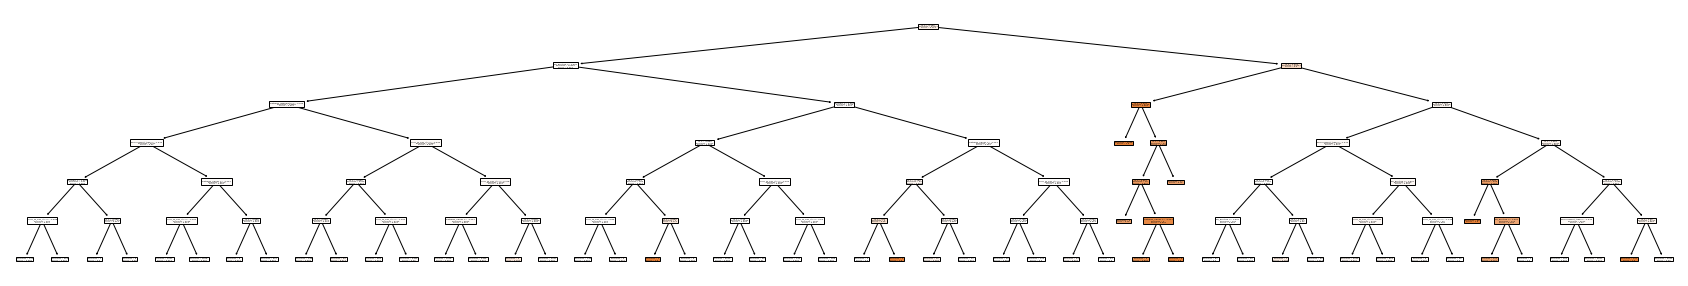

In [1055]:
# Estructura del arbol creado
modelo_final2 = regrs_opt.best_estimator_
print(f"Profundidad del árbol: {modelo_final2.get_depth()}")
print(f"Número de nodos terminales: {modelo_final2.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(30, 5))
plot = plot_tree(
            decision_tree = modelo_final2,
            feature_names = X.columns,
            filled        = True,
            impurity      = False,
            ax            = ax
       )

## Prediccion y evaluacion del modelo

In [1056]:
predicciones = modelo2.predict(X = X_test)

rmse = mean_squared_error(
    y_true = Y_test,
    y_pred = predicciones,
    squared = False
)
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.09464356522021472


In [1057]:
predicciones = modelo_final2.predict(X = X_test)

rmse = mean_squared_error(
    y_true = Y_test,
    y_pred = predicciones,
    squared = False
)
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.06605510586783764


El proceso de podado consigue reducir el error rmse del modelo de 0.00424 a 0.017. Las predicciones ultimo modelo de arbol de decision se alejan en promedio 0.017 unidades del valor real. 

# Modelo de regresion con Redes neuronales 

In [1059]:
def constructor_modelo():
# Definicion del modelo
  modelo3 = keras.Sequential([
  layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
  layers.Dense(64, activation='relu'),
  layers.Dense(1)])

# Compilacion del modelo
  modelo3.compile(loss='mse',
                optimizer='sgd',
                metrics=['mae', 'mse'])
  return modelo3

In [1060]:
model = constructor_modelo()

In [1061]:
historico = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
970/970 [==============================] - 2s 2ms/step - loss: 0.0748 - mae: 0.1722 - mse: 0.0748
Epoch 2/100
970/970 [==============================] - 2s 2ms/step - loss: 0.0587 - mae: 0.1523 - mse: 0.0587
Epoch 3/100
970/970 [==============================] - 2s 2ms/step - loss: 0.0500 - mae: 0.1436 - mse: 0.0500
Epoch 4/100
970/970 [==============================] - 2s 2ms/step - loss: 0.0444 - mae: 0.1396 - mse: 0.0444
Epoch 5/100
970/970 [==============================] - 2s 2ms/step - loss: 0.0404 - mae: 0.1347 - mse: 0.0404
Epoch 6/100
970/970 [==============================] - 2s 2ms/step - loss: 0.0372 - mae: 0.1294 - mse: 0.0372
Epoch 7/100
970/970 [==============================] - 2s 2ms/step - loss: 0.0345 - mae: 0.1242 - mse: 0.0345
Epoch 8/100
970/970 [==============================] - 2s 2ms/step - loss: 0.0321 - mae: 0.1184 - mse: 0.0321
Epoch 9/100
970/970 [==============================] - 2s 2ms/step - loss: 0.0302 - mae: 0.1130 - mse: 0.0302
Epoch 10/1

In [1062]:
# Se muestra el history de las ultimas 5 epocas realizadas
hist = pd.DataFrame(historico.history)
hist['epoch'] = historico.epoch
hist.tail()

,loss,mae,mse,epoch
95,0.014513,0.063024,0.014513,95
96,0.014438,0.062762,0.014438,96
97,0.014377,0.062776,0.014377,97
98,0.014409,0.062736,0.014409,98
99,0.014325,0.062517,0.014325,99


Se puede observar que el error cuadratico medio empezo generando un valor de 0.074 y fue mejorando sus predicciones  llegando a 0,062

In [1063]:
# Resumen del modelo
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                704       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


Se puede evideniar que el modelo que se realizo fue uno secuencial, con sus capas respectivas y cada una de ellas con 64 neuronas

## Analizando errores

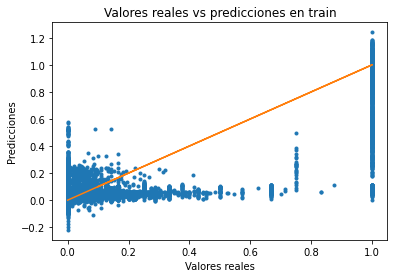

In [1064]:
Y_train_pred = model.predict(X_train)
plt.title('Valores reales vs predicciones en train')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
_ = plt.plot(Y_train, Y_train_pred, '.', Y_train, Y_train, '-')

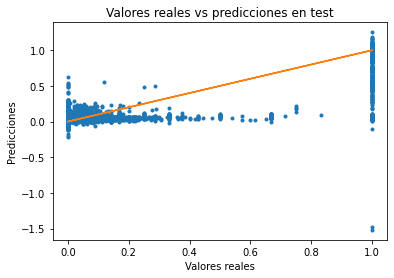

In [1065]:
Y_test_pred = model.predict(X_test)
plt.title('Valores reales vs predicciones en test')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
_ = plt.plot(Y_test, Y_test_pred, '.', Y_test, Y_test, '-')

Se puede observar que la linea de test no toma los outliers

## Validacion del modelo

In [1066]:
scores = model.evaluate(X_train, Y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
1
2
scores = model.evaluate(X_train, Y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

970/970 [==============================] - 2s 1ms/step - loss: 0.0142 - mae: 0.0626 - mse: 0.0142

mae: 6.26%
970/970 [==============================] - 1s 1ms/step - loss: 0.0142 - mae: 0.0626 - mse: 0.0142

mae: 6.26%


El modelo me esta prediciendo el 6.26%